## Titanic - analysis

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import file 

data=pd.read_csv('titanic.csv')

In [8]:
#create a copy of the file to work on and see top 5 rows

df=data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#see info on file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check for duplicates

df.duplicated().sum()

np.int64(0)

In [10]:
#convert 'age' column to a string

df['Age']=df['Age'].astype('string')

In [12]:
#fill empty 'Age' column with 'unknown'

df['Age']=df['Age'].fillna('unknown')

In [13]:
#see what 'Embarked' column entails

print(df['Embarked'].unique())
print(df['Embarked'].value_counts())

['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [15]:
# fill empty columns with 'S' as it was the most popular port to embark from

df['Embarked']=df['Embarked'].fillna('S')

In [18]:
#see what 'Cabin' column entails

print(df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [20]:
#the cabin numbers all start with a letter which probably refers to the deck, extract the deck.

df['Deck']=df['Cabin'].astype('string').str[0]

In [22]:
#fill empty 'Deck' columns with 'unknown'

df['Deck']=df['Deck'].fillna('Unknown')

In [23]:
#see info on columns now

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    string 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Deck         891 non-null    string 
dtypes: float64(1), int64(5), object(5), string(2)
memory usage: 90.6+ KB


In [25]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [37]:
#the max spent on fare is 512, let's see which deck people who generally paid more were staying on

print(df[df['Fare'] > 250][['Fare', 'Pclass','Deck']])

         Fare  Pclass     Deck
27   263.0000       1        C
88   263.0000       1        C
258  512.3292       1  Unknown
311  262.3750       1        B
341  263.0000       1        C
438  263.0000       1        C
679  512.3292       1        B
737  512.3292       1        B
742  262.3750       1        B


In [45]:
#check how many classes there are and how many of each

df['Pclass'].unique()
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    string 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Deck         891 non-null    string 
dtypes: float64(1), int64(5), object(5), string(2)
memory usage: 90.6+ KB


In [48]:
#drop irrelevant columns

df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Unknown
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Unknown
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,unknown,1,2,23.4500,S,Unknown
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C


In [49]:
#create a 'family_size' column so that we can remove 'SibSp' and 'Parch'

df['Family_size']=df['SibSp'] + df['Parch'] + 1
df['Family_size']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family_size, Length: 891, dtype: int64

In [50]:
#drop 'SibSp' and 'Parch'

df.drop(['SibSp','Parch'], axis=1, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Deck,Family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Unknown,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Unknown,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,C,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Unknown,1
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,Unknown,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,B,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,unknown,23.4500,S,Unknown,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,C,1


In [52]:
#convert 'Sex' to a numeric value

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [98]:
df = pd.get_dummies(df, columns=['Sex'])
df

,Survived,Pclass,Name,Age,Fare,Deck,Family_size,Embarked_Q,Embarked_S,age_group,Sex_0,Sex_1
0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,Unknown,2,False,True,20s,True,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,2,False,False,30s,False,True
2,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,Unknown,1,False,True,20s,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,C,2,False,True,30s,False,True
4,0,3,"Allen, Mr. William Henry",35.0,8.0500,Unknown,1,False,True,30s,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,13.0000,Unknown,1,False,True,20s,True,False
887,1,1,"Graham, Miss. Margaret Edith",19.0,30.0000,B,1,False,True,teens,False,True
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",<NA>,23.4500,Unknown,4,False,True,Unknown,False,True
889,1,1,"Behr, Mr. Karl Howell",26.0,30.0000,C,1,False,False,20s,True,False


In [100]:
X = df.drop(['Name'], axis=1)
X

,Survived,Pclass,Age,Fare,Deck,Family_size,Embarked_Q,Embarked_S,age_group,Sex_0,Sex_1
0,0,3,22.0,7.2500,Unknown,2,False,True,20s,True,False
1,1,1,38.0,71.2833,C,2,False,False,30s,False,True
2,1,3,26.0,7.9250,Unknown,1,False,True,20s,False,True
3,1,1,35.0,53.1000,C,2,False,True,30s,False,True
4,0,3,35.0,8.0500,Unknown,1,False,True,30s,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,Unknown,1,False,True,20s,True,False
887,1,1,19.0,30.0000,B,1,False,True,teens,False,True
888,0,3,<NA>,23.4500,Unknown,4,False,True,Unknown,False,True
889,1,1,26.0,30.0000,C,1,False,False,20s,True,False


In [53]:
#create dummies for 'Embarked' column

df=pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df

,Survived,Pclass,Name,Sex,Age,Fare,Deck,Family_size,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,Unknown,2,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,2,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,Unknown,1,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C,2,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,Unknown,1,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,13.0000,Unknown,1,False,True
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,30.0000,B,1,False,True
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,unknown,23.4500,Unknown,4,False,True
889,1,1,"Behr, Mr. Karl Howell",0,26.0,30.0000,C,1,False,False


## Exploratory Data Analysis

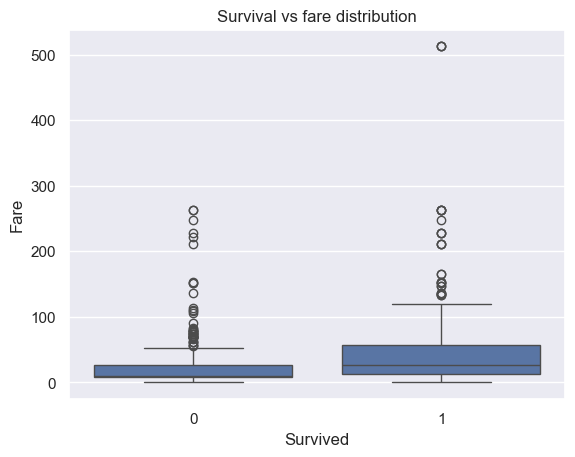

In [58]:
#payment vs survival rate

sns.boxplot(x='Survived',y='Fare',data=df)
plt.title('Survival vs fare distribution')
plt.show()

According to this graph, the middle 50% of people who survived, paid more than the middle 50% of people who paid a lower fare. 
There is more of a variability in fare among survivors. This implies that there were more higher-paying and moderately-paying passengers 
among the survivors. Socioeconomics bias might have played a role since there are many outliers in the group of survivors, wealth probably 
played a role in who got access to life boats.

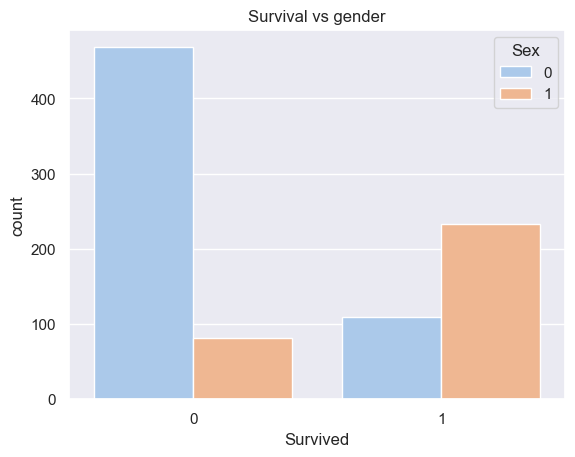

In [77]:
#survival based on gender

sns.countplot(x='Survived', hue='Sex', data=df, palette='pastel')
plt.title('Survival vs gender')
plt.show()

These graphs suggests that most male passengers did not survive. The reason for this could by that children and women were the first
ones allowed on the life boats.

In [71]:
#group ages

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  


def age_group(age):
    if pd.isna(age):
        return 'Unknown'
    age = int(age)
    if age >= 90: return '90s'
    elif age >= 80: return '80s'
    elif age >= 70: return '70s'
    elif age >= 60: return '60s'
    elif age >= 50: return '50s'
    elif age >= 40: return '40s'
    elif age >= 30: return '30s'
    elif age >= 20: return '20s'
    elif age >= 10: return 'teens'
    else: return 'child'

# Apply the function row-wise
df['age_group'] = df['Age'].apply(age_group)


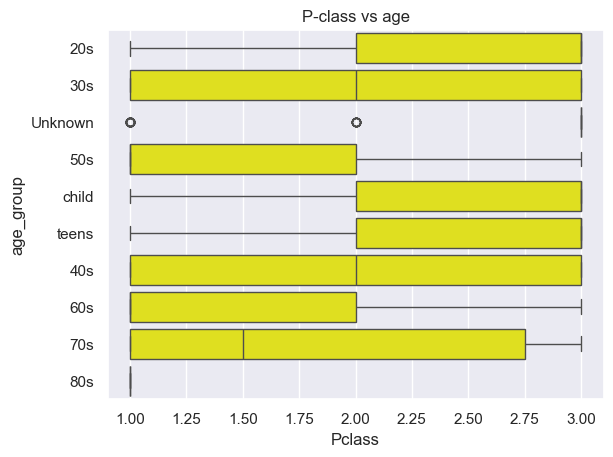

In [72]:
# age vs p-class

sns.boxplot(x='Pclass', y='age_group', data=df, color='yellow')
plt.title('P-class vs age')
plt.show()

Younger passengers (children, teens, 20s) were mostly in Pclass 2/3. This suggest than young people tend to be in lower classes.
Elder passengers(60s, 70s, 80s) were leaning towards Pclass 1/2, this suggest more wealth and higher status in elder people.

In [83]:
# calculate mean of where passengers embarked from

class_embark=df.groupby('Pclass')[['Embarked_Q','Embarked_S']].mean()


In [84]:
# calculate class C

class_embark['Embarked_C']=1-class_embark['Embarked_Q']-class_embark['Embarked_S']

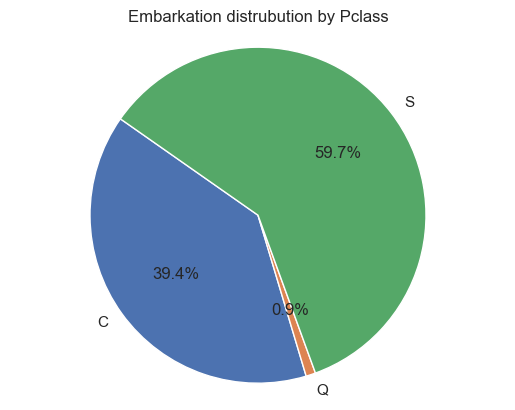

In [85]:
#create pie chart

labels= ['C','Q','S']
sizes=class_embark.loc[1,['Embarked_C', 'Embarked_Q', 'Embarked_S']]

plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=145)
plt.title('Embarkation distrubution by Pclass')
plt.axis('equal')
plt.show()

This pie chart suggests that most of the passengers embarked from Southampton, the second most popular embarking port is 
Cherbourg. Very few passengers embarked from Queenstown.

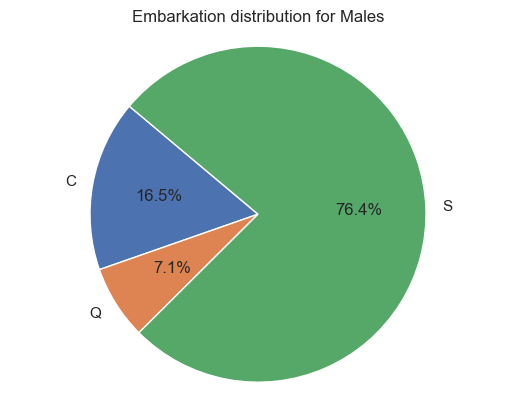

In [91]:
# Pie chart for men and where they embarked from

embark_by_sex = df.groupby('Sex')[['Embarked_Q', 'Embarked_S']].mean()
embark_by_sex['Embarked_C'] = 1 - embark_by_sex['Embarked_Q'] - embark_by_sex['Embarked_S']

# Plot for 'male'
sizes = embark_by_sex.loc[0, ['Embarked_C', 'Embarked_Q', 'Embarked_S']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Embarkation distribution for Males')
plt.axis('equal')
plt.show()


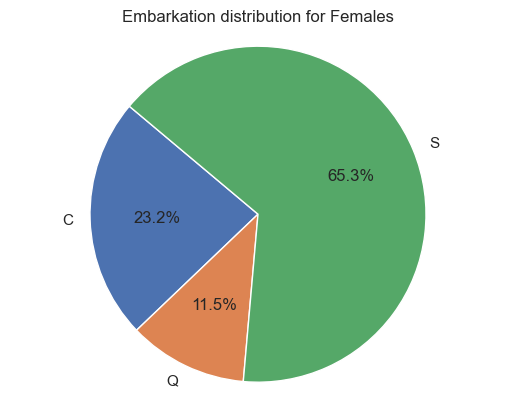

In [92]:
# Pie chart for women and where they embarked from

embark_by_sex = df.groupby('Sex')[['Embarked_Q', 'Embarked_S']].mean()
embark_by_sex['Embarked_C'] = 1 - embark_by_sex['Embarked_Q'] - embark_by_sex['Embarked_S']

# Plot for 'male'
sizes = embark_by_sex.loc[1, ['Embarked_C', 'Embarked_Q', 'Embarked_S']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Embarkation distribution for Females')
plt.axis('equal')
plt.show()

## Train/test split

In [93]:
from sklearn.model_selection import train_test_split

In [114]:
X = df.drop(['Survived','Name','Deck','age_group','Age'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [115]:
#initialize and fit the model

model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [116]:
#predictions

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed performance report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.776536312849162
Confusion Matrix:
 [[88 17]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



This means your model correctly predicted survival 77.65% of the time on the test set.

88 people were correctly predicted to not survive.
51 people were correctly predicted to survive.
23 survivors were missed by the model.
17 people were wrongly predicted to survive.

Precision: Out of all predicted survivors, how many actually survived?
precision = TP / (TP + FP)

Recall: Out of all actual survivors, how many did we correctly predict?
recall = TP / (TP + FN)

F1-score: Harmonic mean of precision and recall
F1 = 2 * (precision * recall) / (precision + recall)

Macro avg: Unweighted average of both classes

Weighted avg: Weighted by the support (class size)

In [118]:
# cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated accuracy scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validated accuracy scores: [0.77653631 0.79775281 0.79775281 0.78651685 0.81460674]
Average accuracy: 0.7946331052664616


These are scores from 5-fold cross-validation, giving a better sense of generalization.

Your average accuracy across folds is ~79.5%, which supports that your test accuracy (77.7%) is realistic.

In [119]:
#feature importance

importance = pd.Series(model.coef_[0], index=X.columns)
print(importance.sort_values(ascending=False))


Sex_1          1.343442
Fare           0.002916
Family_size   -0.174168
Embarked_Q    -0.249882
Embarked_S    -0.483629
Pclass        -0.760481
Sex_0         -1.343237
dtype: float64


Sex_1(female) = Female  strongly increases chance of survival

Sex_0 (male) = -1.34: equal and opposite 

Pclass = -0.76: being in a higher class (1st class = lower number) increases survival

Embarked_S = -0.48: embarking from Southampton reduces survival odds

Fare = 0.0029: higher fare slightly increases chance of survival

Family_size = -0.17: having a bigger family slightly decreases survival odds

## Summary


Accuracy:	Overall performance: ~77.7%
Confusion Matrix:	Model performs better at predicting non-survivors (0)
Classification Report:	Good balance, but recall for survivors could be improved
Cross-validation:	Model generalizes well — consistent across 5 folds
Coefficients:	Sex and Pclass are the most influential features
